In [0]:
! git clone https://github.com/Harivind/Data.git

Cloning into 'Data'...
remote: Enumerating objects: 26713, done.
remote: Counting objects: 100% (26713/26713), done.
remote: Compressing objects: 100% (26517/26517), done.
remote: Total 26713 (delta 195), reused 26713 (delta 195), pack-reused 0
Receiving objects: 100% (26713/26713), 133.14 MiB | 13.09 MiB/s, done.
Resolving deltas: 100% (195/195), done.
Checking out files: 100% (25394/25394), done.


In [0]:
ls

Data/  sample_data/


In [0]:
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
from keras.applications.vgg16 import VGG16, preprocess_input


Using TensorFlow backend.


In [0]:
preprocess_input()

In [0]:
base_model=VGG16(weights="imagenet",include_top=False, input_shape=(100,100,3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [0]:
base_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:

base_model.output

<tf.Tensor 'block5_pool/MaxPool:0' shape=(?, 3, 3, 512) dtype=float32>

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(657, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

preprocess_input()

In [0]:
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [0]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True


0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [0]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
batch_size=64
train_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './Data/Hnd/Img/',  # This is the source directory for training images
        target_size=(100,100),  # All images will be resized to 200 x 200
        batch_size=128,
        # Specify the classes explicitly
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

total_sample=train_generator.n

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


Found 16425 images belonging to 657 classes.


In [0]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=15,
        verbose=1)

Epoch 1/15
256/256 [==============================] - 436s 2s/step - loss: 6.5424 - acc: 0.0017
Epoch 2/15
189/256 [=====================>........] - ETA: 1:50 - loss: 6.5429 - acc: 0.0017

KeyboardInterrupt: ignored

In [0]:
model.save("./1st.h5")


NameError: ignored

In [0]:
ls

1st  1st.h5  Kannada-OCR/  sample_data/


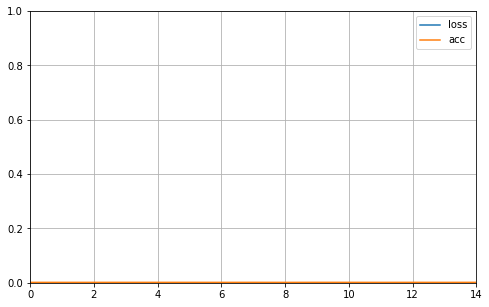

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()